In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-03 13:30:00,814 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-03 13:30:00,814 -INFO - common:common.py:616 - Module utils.common is loaded...
2021-06-03 13:30:00,823 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-03 13:30:00,824 -INFO - dataset_builder:dataset_builder.py:200 - dataset package is loaded...
2021-06-03 13:30:01,432 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://jdi-testing.github.io/jdi-light/'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
decoder_dict

{0: 'button',
 1: 'link',
 2: 'iframe',
 3: 'textfield',
 4: 'dropdown',
 5: 'checkbox_btn',
 6: 'checkbox_label',
 7: 'radiobutton_btn',
 8: 'radiobutton_label',
 9: 'textarea',
 10: 'text',
 11: 'fileinput',
 12: 'image',
 13: 'colorpicker',
 14: 'range',
 15: 'progressbar',
 16: 'datetimeselector',
 17: 'numberselector',
 18: 'dropdownselector',
 19: 'checklist',
 20: 'table',
 21: 'n/a'}

# Generate dataset

2021-06-03 13:30:01,544 -WARNING - dataset_builder:dataset_builder.py:75 - The default dataset name "dummy" will be used
2021-06-03 13:30:01,544 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-06-03 13:30:01,544 -INFO - dataset_builder:dataset_builder.py:121 - Creating driver
2021-06-03 13:30:02,615 -INFO - dataset_builder:dataset_builder.py:129 - Chrome web driver is created
2021-06-03 13:30:02,615 -INFO - <ipython-input-6-539263dfd9ac>:<ipython-input-6-539263dfd9ac>:5 - getting page
2021-06-03 13:30:10,935 -INFO - common:common.py:75 - Window maximized
2021-06-03 13:30:10,936 -INFO - dataset_builder:dataset_builder.py:132 - save scrinshot: dataset/images/dummy.png
2021-06-03 13:30:10,989 -INFO - dataset_builder:dataset_builder.py:176 - Collect features using JS script
2021-06-03 13:30:11,316 -INFO - dataset_builder:dataset_builder.py:184 - Save html to dataset/html/dummy.html
2021-06-03 13:30:11,323 -INFO - dataset_builder:dataset_builder.p

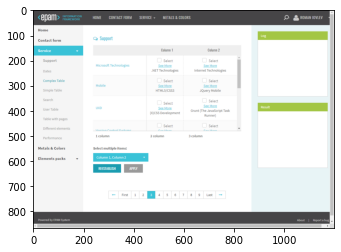

In [6]:
DATASET_NAME = 'dummy'
class JDIDatasetBuilder(DatasetBuilder):

    def setUp(self, driver):
        self.logger.info(f'getting page')
        driver.get(SITE_URL)
        
        driver.find_element_by_id("user-icon").click()
        driver.find_element_by_id("name").send_keys(LOGIN)
        driver.find_element_by_id("password").send_keys(PASSWORD)
        driver.find_element_by_id("login-button").click()
        sleep(WAIT_TIME_SECONDS)
        
        driver.find_element_by_link_text("Service").click()
        driver.find_element_by_link_text("Complex Table").click()
        maximize_window(driver=driver)
        

with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
    elements_df = builder.dataset
    plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))



In [7]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [8]:
df = build_features(df)

2021-06-03 13:30:11,766 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [9]:
elements_dict = build_elements_dict(df)

In [10]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

,tag_name,element_id,parent_id,upper_sibling,lower_sibling,displayed,is_hidden,x,y,width,height
0,HTML,3744767211162109928038618108,None,None,None,True,0,0.000000,0.0,1183.000000,850.0
1,HEAD,6925680801162109923664467489,3744767211162109928038618108,None,8469472241162109920319165777,False,0,0.000000,0.0,0.000000,0.0
2,META,2225825583162109929821791193,6925680801162109923664467489,None,2300636737162109928512113208,False,0,0.000000,0.0,0.000000,0.0
3,TITLE,2300636737162109928512113208,6925680801162109923664467489,2225825583162109929821791193,1197421539162109929182652441,False,0,0.000000,0.0,0.000000,0.0
4,META,1197421539162109929182652441,6925680801162109923664467489,2300636737162109928512113208,0547035912162109922508211904,False,0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
421,LI,4861146996162109934283578864,3340198092162109930803969068,6309690536162109934583488377,None,True,0,1115.890625,828.0,64.109375,15.0
422,A,7044995601162109938119651182,4861146996162109934283578864,None,None,True,0,1115.890625,828.0,64.109375,15.0
423,SCRIPT,2730210117162109930922238368,8469472241162109920319165777,4306913002162109935698370856,1374445489162109938803014559,False,1,0.000000,0.0,0.000000,0.0
424,SCRIPT,1374445489162109938803014559,8469472241162109920319165777,2730210117162109930922238368,1811758187162109938612899870,False,1,0.000000,0.0,0.000000,0.0


In [11]:
# img = load_gray_image('dataset/images/dummy.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')

In [12]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-03 13:30:12,218 -INFO - common:common.py:489 - Num radio buttons found: 0
2021-06-03 13:30:12,221 -INFO - common:common.py:493 - Num radio2 buttons found: 0
2021-06-03 13:30:12,223 -INFO - common:common.py:500 - Num checkboxes found: 16
2021-06-03 13:30:12,227 -INFO - common:common.py:507 - Num comboboxes/dropdowns found: 0
2021-06-03 13:30:12,229 -INFO - common:common.py:518 - Num textfields found: 2
2021-06-03 13:30:12,231 -INFO - common:common.py:523 - Num texfields for numbers found: 0
2021-06-03 13:30:12,234 -INFO - common:common.py:528 - Num ranges found: 0
2021-06-03 13:30:12,236 -INFO - common:common.py:533 - Num ordinary text inputs found: 0
2021-06-03 13:30:12,237 -INFO - common:common.py:536 - Num buttons found: 5
Button1:  ['1353761045162109931288923234']
2021-06-03 13:30:12,240 -INFO - common:common.py:541 - Num buttons1 found: 1
2021-06-03 13:30:12,242 -INFO - common:common.py:546 - Num buttons2 (Material-UI) found: 0
2021-06-03 13:30:12,244 -INFO - common:common.

1200 867


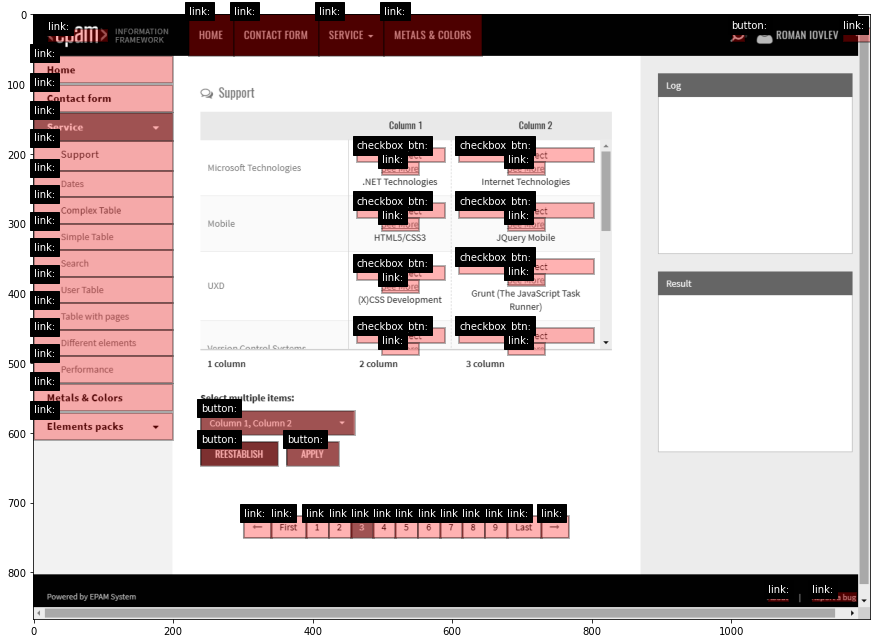

In [13]:
img = load_gray_image('dataset/images/dummy.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in predictions_df.iterrows():
    
    patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(r.x, r.y, 
             decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

# Save labels

In [14]:
# labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
# labels

In [15]:
# labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
# labeled_df.label = labeled_df.label.astype(int)
# display(labeled_df)
# labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

In [16]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

,label,x,y,width,height,box
0,5,0.436667,0.229527,0.055000,0.023068,"(491, 188, 66, 19)"
1,5,0.588333,0.230681,0.058333,0.020761,"(670, 191, 69, 17)"
2,5,0.437083,0.324106,0.057500,0.023068,"(489, 270, 69, 19)"
3,5,0.588333,0.324106,0.058333,0.023068,"(670, 270, 69, 19)"
4,5,0.435000,0.422722,0.055000,0.026528,"(488, 355, 66, 22)"


1200 867


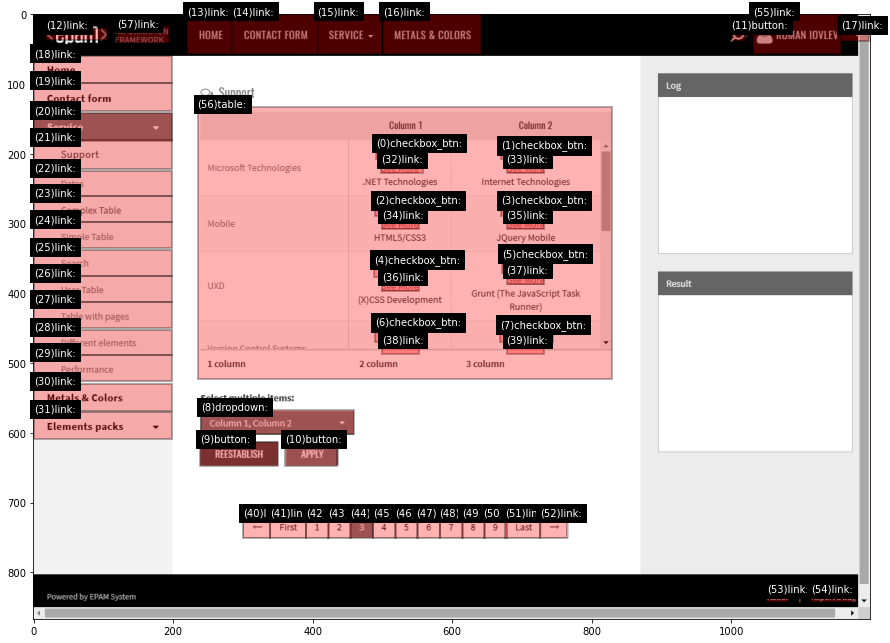

In [17]:
img = load_gray_image('dataset/images/dummy.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for i, r in boxes_df.iterrows():
    x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(x, y, 
             f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

In [18]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings'],
      dtype='object')

In [19]:
def build_labels(df: pd.DataFrame, annotations_file_path: str, img_width: int = 0, img_height: int = 0, 
                 classes_file_path: str='dataset/classes.txt', verbose=True) -> pd.DataFrame:
    """
        mark up dataset: assign labels
        annotations_file_path: yolo-v3 formatted annotation
        - get image sizes MUST be taken from appropriate image,
          because HTML tag has different size (less then actual image is)
        - get dummy_value from dataset/classes.txt 

    """
    logger.info(f'Assign labels from annotation file: {annotations_file_path}')
    
    logger.info('Getting image size')
    # img_width, img_height = df[df.tag_name=='HTML'][['width', 'height']].head(1).values[0]
    logger.info(f'Image size: {(img_width, img_height)}')

    with open(classes_file_path, 'r') as f:
        lines = f.readlines()
        encoder_dict = {line.strip(): i for i, line in enumerate(lines)}
        logger.info(str(encoder_dict))
        decoder_dict = {v: k for k, v in encoder_dict.items()}
        
    if len(encoder_dict) != len(decoder_dict): 
        msg = f'There are duplicate key/values in the {classes_file_path}'
        logger.fatal(msg)
        raise Exception(msg)
        
    logger.info('getting "n/a" class code')   
    try:
        dummy_value = encoder_dict['n/a']
    except Exception as ex:
        logger.error("Cannot get dummy value for class 'n/a'")
        logger.fatal(str(ex))
        raise KeyError
    logger.info(f'"n/a" class code: {dummy_value}')
            
    #df['scalar'] = df.tag_name.map(PRIORITY_TAG_SCALERS).fillna(1.0)
    
    if not os.path.exists(annotations_file_path):
        logger.warning(f'annotation file "{annotations_file_path}", does not exists')
        _ann = [np.array([])]
    else:
        _ann = np.loadtxt(annotations_file_path)
        logger.info(f"{_ann.shape[0]} annotation bas benn read")
        
    # _boxes = df[['x', 'y', 'width', 'height', 'scalar']].values
    _boxes_df = df[['x', 'y', 'width', 'height', 'displayed', 'is_hidden', 'tag_name', 'element_id']]

    labels = []
    i = 0
    
    for bb in tqdm(_ann, desc='Assign labels'):
        c, x, y, w, h = bb

        best_iou = 0.0001  # threshold to filter bad overlaps
        best_idx = -1       # fake value
        best_tag = 'n/a',
        best_rect = (0,0,0,0)
        best_yolo = (0,0,0,0)
        best_label = encoder_dict['n/a']

        for idx, r in _boxes_df.iterrows():
            
#             if r.is_hidden or not r.displayed:  # Important: we must skip hidden and invisible nodes
#                 continue

            iou = iou_xywh(from_yolo(x, y, w, h, img_width, img_height), (r.x, r.y, r.width, r.height))

            if iou >= best_iou:  # We have to use >=, because the next tag might be more important
                best_idx, best_iou, best_tag, best_rect, best_yolo, best_label = \
                            (idx, iou, r.tag_name, (r.x, r.y, r.width, r.height), (x,y,w,h), c)

        if best_idx == -1:  # make sure it is not a fake value
            logger.warning(f'LABEL IS NOT ASSIGNED: {annotations_file_path} {(x, y, w, h)}')
            continue
            
        labels.append({'idx': best_idx,
                       'label': float(best_label),
                       'annotation_line_no': i,
                       'iou': best_iou, 
                       'tag': best_tag, 
                       'label_text': decoder_dict[int(best_label)], 
                       #'best_rect': best_rect, 
                       #'best_yolo': best_yolo
                      })
        i += 1

    if len(labels) != 0:
        labels_df = pd.DataFrame(data=labels)
        labels_df.index = labels_df.idx
        df = df.merge(labels_df, how='left', left_index=True, right_index=True)
        df.label = df.label.fillna(dummy_value).astype(int)
        df.iou = df.iou.fillna(0.0)
        df.label_text = df.label_text.fillna('n/a')
        if verbose:
            display(labels_df)
    else:
        df['label'] = int(dummy_value)
        df['label_text'] = 'n/a'
        df['iou'] = 0.0
    
    # df.drop(columns=['iou', 'idx'], inplace=True)  # drop auxiliary columns

    return df


In [20]:
df = build_labels(df=df, annotations_file_path='dataset/annotations/dummy.txt', img_width=img_width, img_height=img_height)

2021-06-03 13:30:13,561 -INFO - <ipython-input-19-4dda65c4de8d>:<ipython-input-19-4dda65c4de8d>:11 - Assign labels from annotation file: dataset/annotations/dummy.txt
2021-06-03 13:30:13,562 -INFO - <ipython-input-19-4dda65c4de8d>:<ipython-input-19-4dda65c4de8d>:13 - Getting image size
2021-06-03 13:30:13,562 -INFO - <ipython-input-19-4dda65c4de8d>:<ipython-input-19-4dda65c4de8d>:15 - Image size: (1200, 867)
2021-06-03 13:30:13,563 -INFO - <ipython-input-19-4dda65c4de8d>:<ipython-input-19-4dda65c4de8d>:20 - {'button': 0, 'link': 1, 'iframe': 2, 'textfield': 3, 'dropdown': 4, 'checkbox_btn': 5, 'checkbox_label': 6, 'radiobutton_btn': 7, 'radiobutton_label': 8, 'textarea': 9, 'text': 10, 'fileinput': 11, 'image': 12, 'colorpicker': 13, 'range': 14, 'progressbar': 15, 'datetimeselector': 16, 'numberselector': 17, 'dropdownselector': 18, 'checklist': 19, 'table': 20, 'n/a': 21}
2021-06-03 13:30:13,563 -INFO - <ipython-input-19-4dda65c4de8d>:<ipython-input-19-4dda65c4de8d>:28 - getting "n/a

Assign labels:   0%|          | 0/58 [00:00<?, ?it/s]

,idx,label,annotation_line_no,iou,tag,label_text
idx,,,,,,
213,213,5.0,0,0.634251,LABEL,checkbox_btn
219,219,5.0,1,0.742965,LABEL,checkbox_btn
228,228,5.0,2,0.746807,LABEL,checkbox_btn
234,234,5.0,3,0.746807,LABEL,checkbox_btn
243,243,5.0,4,0.572911,LABEL,checkbox_btn
249,249,5.0,5,0.754803,LABEL,checkbox_btn
258,258,5.0,6,0.663039,LABEL,checkbox_btn
264,264,5.0,7,0.725706,LABEL,checkbox_btn
340,340,4.0,8,0.885072,BUTTON,dropdown


In [21]:
# df = build_labels(df=df, annotations_file_path='dataset/annotations/dummy.txt', img_width=0, img_height=0)

In [22]:
df.label.value_counts()

21    368
1      45
5       8
0       3
4       1
20      1
Name: label, dtype: int64

1200 867


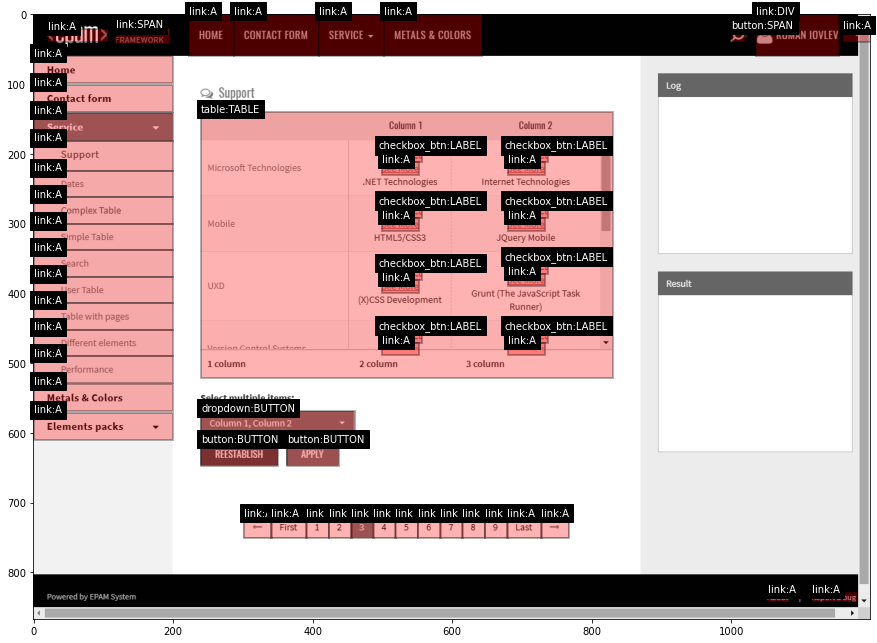

In [23]:
img = load_gray_image('dataset/images/dummy.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name, # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
